
# Synthetic Cell Simulation using Voronoi and CPM

This notebook implements a simulation to generate synthetic cell data using a combination of **Voronoi diagrams** and **Cellular Potts Model (CPM)**-inspired growth principles. 
We will:
- Initialize non-overlapping cell regions using Voronoi diagrams
- Simulate cell growth within each region based on energy and adhesion properties (inspired by CPM)
- Assign a synthetic gene expression matrix to each cell using stochastic noise
- Visualize the cells with color-coding based on gene expression data

---


In [7]:
import scipy 

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import random
import pandas as pd



## Step 1: Voronoi Diagram Initialization
We start by creating a Voronoi diagram to initialize cell regions, ensuring non-overlapping boundaries. Each Voronoi cell will represent an individual cell in the simulation.


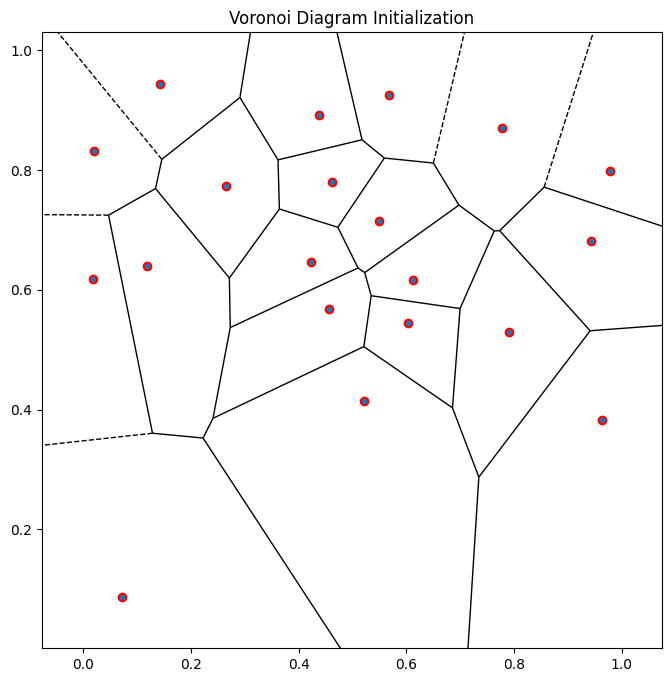

In [8]:

# Generate random seed points
num_cells = 20  # Number of cells to simulate
np.random.seed(0)
points = np.random.rand(num_cells, 2)

# Create Voronoi diagram based on the points
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black')
plt.scatter(points[:, 0], points[:, 1], color='red')
plt.title('Voronoi Diagram Initialization')
plt.show()



## Step 2: CPM-Inspired Cell Growth and Properties

In this section, we define properties like **energy** and **adhesion** for each cell, inspired by CPM. We assign each cell an initial energy level and simulate growth by adjusting cell boundaries (simulated here as cell area).


In [9]:

# Define initial properties for each cell
cell_properties = {
    'energy': np.random.rand(num_cells) * 10,  # Random initial energy level
    'adhesion': np.random.rand(num_cells) * 5  # Random adhesion strength
}

# Basic function to simulate growth based on energy (placeholder function)
def simulate_growth(cell_properties):
    # Placeholder logic to increment cell energy to simulate growth over time
    for i in range(num_cells):
        cell_properties['energy'][i] += random.uniform(-1, 1)  # Simulate slight energy fluctuation
    return cell_properties

# Simulate cell growth over 10 time steps
for _ in range(10):
    cell_properties = simulate_growth(cell_properties)

# Display final cell properties
pd.DataFrame(cell_properties)


,energy,adhesion
0,2.156310,0.794848
1,4.950209,0.551876
2,11.192840,3.281648
3,-1.197615,0.690915
4,7.705784,0.982912
5,11.606156,1.843626
6,1.535563,4.104966
7,0.399566,0.485506
8,1.141628,4.189725
9,2.544657,0.480492



## Step 3: Synthetic Gene Expression Matrix

Each cell is assigned a synthetic gene expression profile based on its properties, with stochastic noise added to simulate variability.


In [10]:

# Generate synthetic gene expression data
num_genes = 50  # Number of genes to simulate

def generate_gene_expression(cell_properties, num_genes):
    gene_expression = []
    for i in range(num_cells):
        # Base expression based on cell's energy and adhesion, with added noise
        expression = cell_properties['energy'][i] * np.random.rand(num_genes) +                      cell_properties['adhesion'][i] * np.random.rand(num_genes)
        gene_expression.append(expression)
    return np.array(gene_expression)

# Generate and display gene expression matrix
gene_expression_matrix = generate_gene_expression(cell_properties, num_genes)
gene_expression_df = pd.DataFrame(gene_expression_matrix, columns=[f'Gene_{i+1}' for i in range(num_genes)])
gene_expression_df.head()


,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_41,Gene_42,Gene_43,Gene_44,Gene_45,Gene_46,Gene_47,Gene_48,Gene_49,Gene_50
0,1.176899,1.234085,0.246003,1.730274,1.674804,1.041916,1.584786,0.721760,1.760242,2.346763,...,1.978018,1.124201,2.220580,1.403365,1.544832,1.485558,0.315889,1.387972,1.983441,0.650804
1,0.955415,3.194170,3.143385,1.191782,4.739052,3.273633,2.857990,3.176014,3.767473,1.868025,...,3.653047,4.803525,1.540712,4.481166,1.046807,5.240424,3.922734,1.507869,5.037611,4.100387
2,3.874203,12.089818,7.102350,2.435458,6.441933,4.209295,11.840793,6.581046,7.495517,8.052819,...,5.321650,2.547129,3.103277,5.463074,3.721509,5.632340,10.261335,10.933672,4.676831,6.191864
3,-0.860422,-0.089843,-0.969970,-0.229476,-0.625547,-0.795435,-0.593441,0.007411,-0.264995,-0.190540,...,-0.819675,-0.534807,-0.051851,0.404066,-0.115386,-0.068482,-0.701585,0.590572,-0.250967,-0.033220
4,0.570005,2.592964,1.785611,3.491359,1.217853,4.768927,3.517114,7.583039,8.118091,5.146823,...,5.093531,2.213840,0.404772,5.856187,0.996625,3.166686,4.245931,7.976751,1.128392,4.020465



## Step 4: Visualization with Gene Expression

Visualize the cells and color them based on an arbitrary gene expression level (e.g., Gene_1) to demonstrate how expression data could be mapped visually.


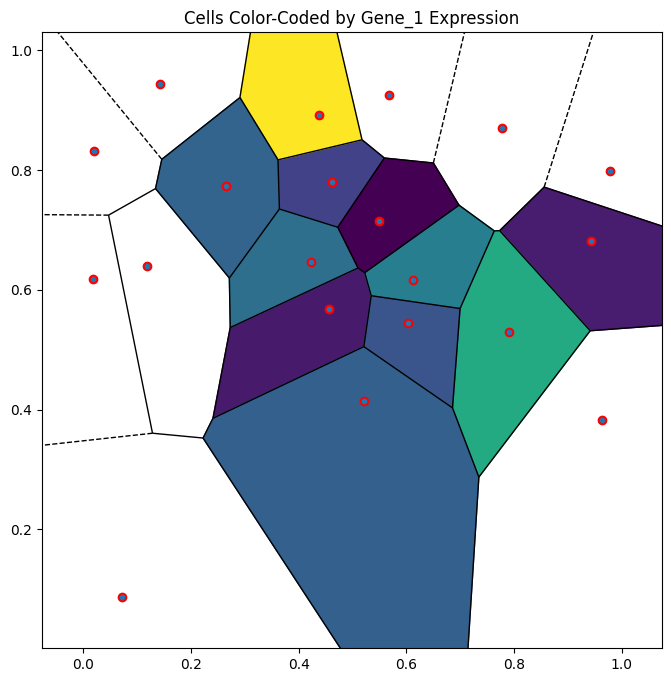

In [11]:

# Plot Voronoi cells with color-coding based on expression level of Gene_1
gene_1_expression = gene_expression_matrix[:, 0]  # Use the first gene for color coding
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black')

# Color cells based on Gene_1 expression
for region, expr in zip(vor.regions, gene_1_expression):
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        ax.fill(*zip(*polygon), color=plt.cm.viridis(expr / max(gene_1_expression)))

plt.scatter(points[:, 0], points[:, 1], color='red')
plt.title('Cells Color-Coded by Gene_1 Expression')
plt.show()
